### California House Prediction — Assignment Notebook

- **Author**: Mridul M Kumar
- **Course**:-LAB
- **Date**:- 04-09-2025

In [1]:
import pandas as pd
import numpy as np


In [2]:
# Read California Housing dataset
california_housing = pd.read_csv('california_housing.csv')

# Display basic information about the dataset
print("California Housing Dataset:")
print(f"Shape: {california_housing.shape}")
print(f"Columns: {list(california_housing.columns)}")
print("\nFirst 5 rows:")
california_housing.head()


California Housing Dataset:
Shape: (20640, 10)
Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

First 5 rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Display data types and basic statistics for both datasets
print("\n=== CALIFORNIA HOUSING DATASET INFO ===")
print(california_housing.info())



=== CALIFORNIA HOUSING DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


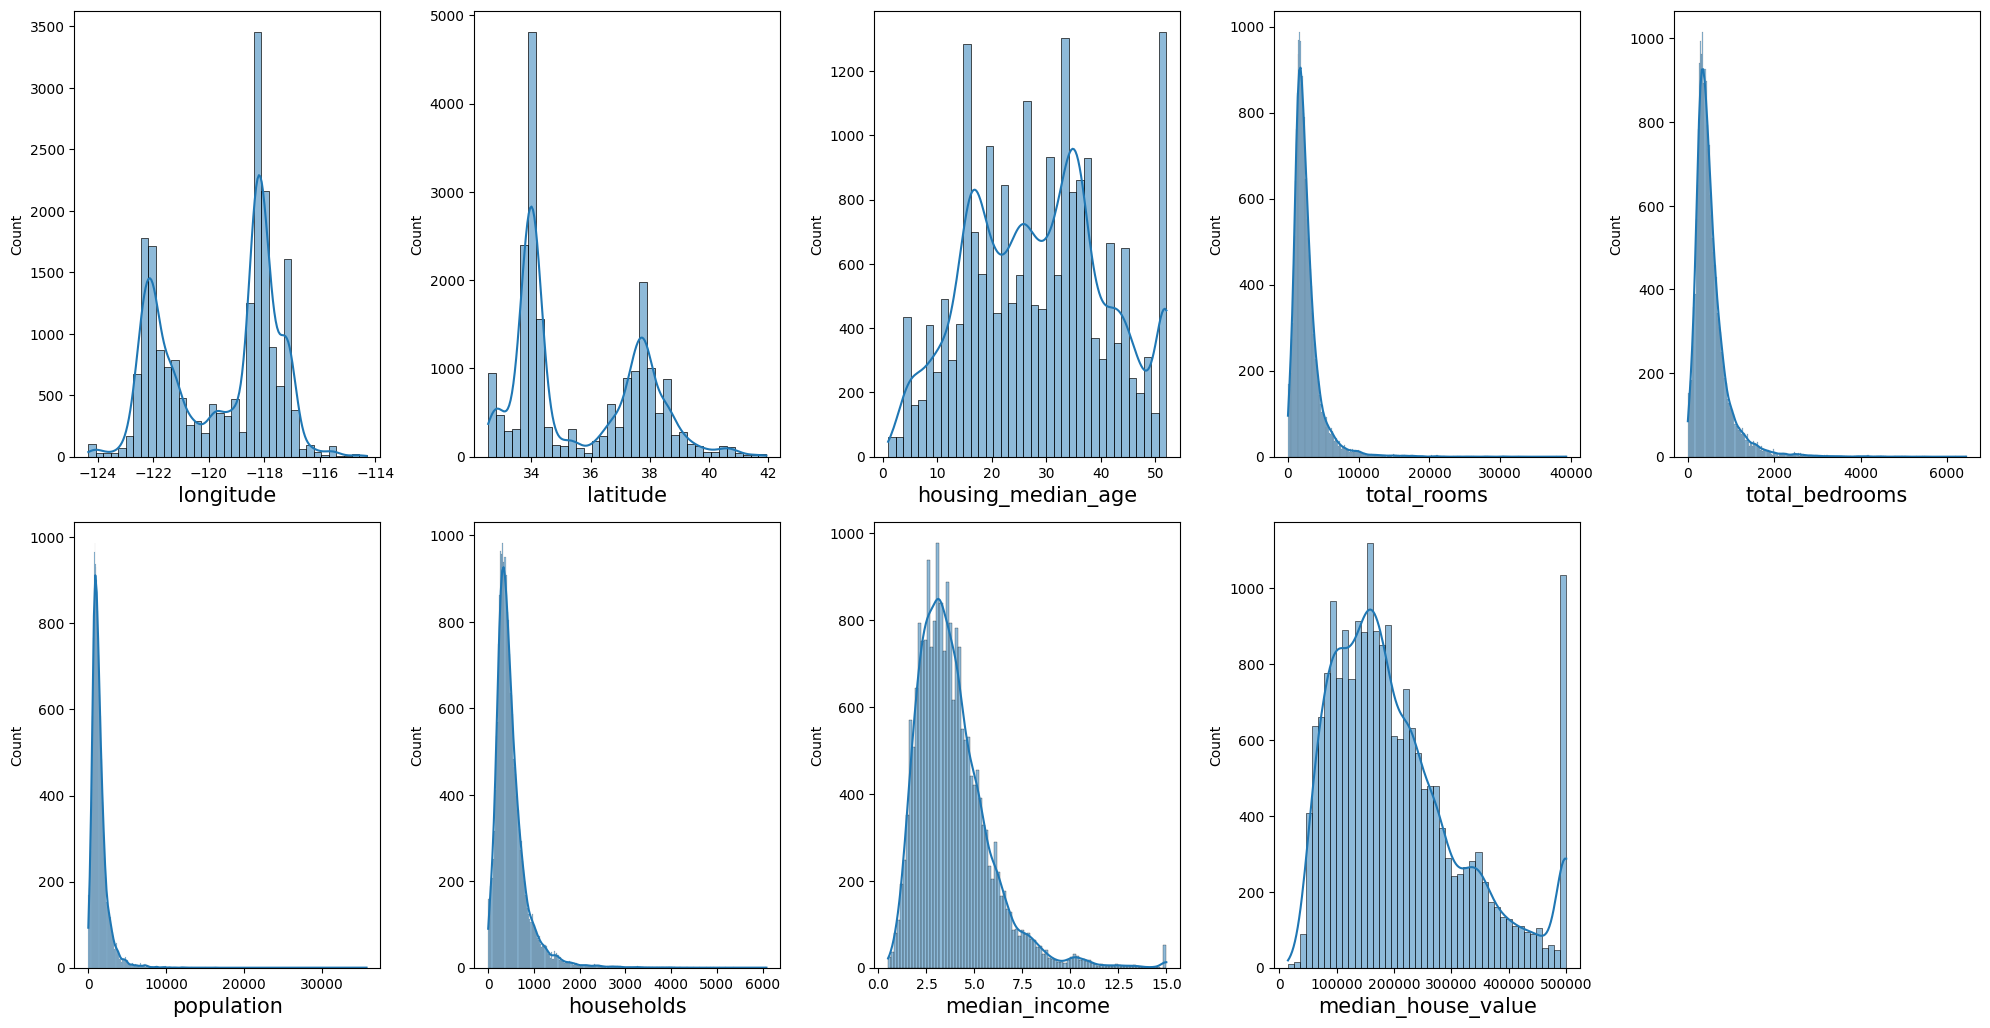

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = california_housing.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in numeric_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(california_housing[column], kde=True, ax=ax)
        plt.xlabel(column, fontsize=15)
        plotnumber += 1
    else:
        break

plt.tight_layout()
plt.show()

### Missing values


In [5]:
california_housing.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Impute missing values (numeric median)


In [6]:
california_housing = california_housing.fillna(california_housing.median(numeric_only=True))


### Features and target


In [7]:
df = california_housing.copy()
X = df.select_dtypes(include=['number']).drop(columns=['median_house_value'], errors='ignore')
y = df['median_house_value']
print("X columns:", list(X.columns))
print("Target:", 'median_house_value')


X columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Target: median_house_value


### Strongest correlations with target


In [8]:
corr = df.select_dtypes(include=['number']).corr(numeric_only=True)['median_house_value'].drop('median_house_value').sort_values(ascending=False)
print("Top + correlations:\n", corr.head(5))
print("\nTop - correlations:\n", corr.tail(5))


Top + correlations:
 median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
Name: median_house_value, dtype: float64

Top - correlations:
 households        0.065843
total_bedrooms    0.049457
population       -0.024650
longitude        -0.045967
latitude         -0.144160
Name: median_house_value, dtype: float64


### Train/test split (80/20)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape : {x_test.shape}")
print(f"y shape      : {y.shape}")


x_train shape: (16512, 8)
x_test shape : (4128, 8)
y shape      : (20640,)


### Train Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
lin_reg1.fit(cx_train, cy_train)
import pandas as pd
print("Slope (coefficients):\n", california_housing.Series(lin_reg1.coef_, index=x1.columns))
print("Intercept:", lin_reg1.intercept_)


Slope (coefficients):
 longitude            -42632.391717
latitude             -42450.071863
housing_median_age     1182.809649
total_rooms              -8.187977
total_bedrooms          116.260128
population              -38.492213
households               46.342572
median_income         40538.404387
dtype: float64
Intercept: -3578224.2348177833


### Evaluate performance


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

cy_pred = lin_reg1.predict(cx_test)
c_mae = mean_absolute_error(cy_test, cy_pred)
c_mse = mean_squared_error(cy_test, cy_pred)
c_rmse = np.sqrt(c_mse)
c_r2 = r2_score(cy_test, y_pred)
accuracy_pct = c_r2 * 100
print(f"MAE  : {c_mae:.2f}")
print(f"MSE  : {c_mse:.2f}")
print(f"RMSE : {c_rmse:.2f}")
print(f"R2   : {c_r2:.2f}")
print(f"Accuracy (% via R2): {accuracy_pct:.1f}%")


MAE  : 51810.48
MSE  : 5059928371.17
RMSE : 71133.17
R2   : 0.61
Accuracy (% via R2): 61.4%


### Regression line for strongest single feature


Strongest feature: median_income, slope: 41793.849, intercept: 45085.577


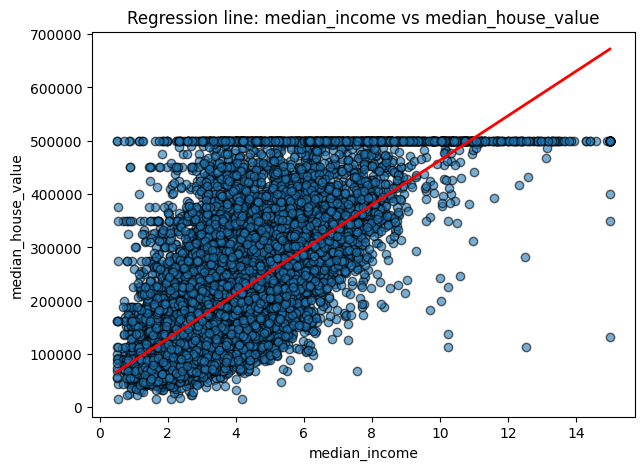

In [12]:
strong_feature = corr.index[0]
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(df[strong_feature], df['median_house_value'], alpha=0.6, edgecolor='k')
# Fit simple line for this feature
m, b = np.polyfit(df[strong_feature], df['median_house_value'], 1)
x_line = np.linspace(df[strong_feature].min(), df[strong_feature].max(), 100)
plt.plot(x_line, m*x_line + b, color='red', lw=2)
plt.xlabel(strong_feature)
plt.ylabel('median_house_value')
plt.title(f'Regression line: {strong_feature} vs median_house_value')
print(f"Strongest feature: {strong_feature}, slope: {m:.3f}, intercept: {b:.3f}")


### Predicted vs Actual plot


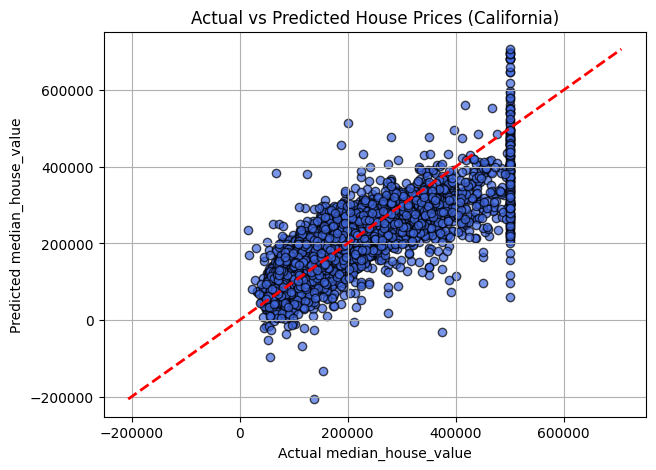

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.7, edgecolor='k')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', lw=2)
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")
plt.title("Actual vs Predicted House Prices (California)")
plt.grid(True)
plt.show()
